### Lab 9 - PRAMOD KUNJUKUNJU SAJI - 8856432

1. Using Keras Datasets, obtain the fMNIST data set. Explore and describe it as you would do with any new dataset that you start working with (2 points).

In [80]:
# Import necessary libraries
from tensorflow import keras
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import (
    confusion_matrix
)

In [81]:
# Load data from MNIST dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

In [82]:
# Set the class names
labels={
    0:'T-shirt/top',
    1:'Trouser',
    2:'hoodie',
    3:'Dress',
    4:'Coat',
    5:'Sandal',
    6:'Shirt',
    7:'boot',
    8:'Bag',
    9:'Ankle boot'
}

## Data Exploration

In [83]:
print(f'Image DType: {type(train_images)}')
print(f'Image Element DType: {type(train_images[0,0,0])}')
print(f'Label Element DType: {type(train_labels[0])}')
print('**Shapes:**')
print('Train Data:')
print(f'Images: {train_images.shape}')
print(f'Labels: {train_labels.shape}')
print('Test Data:')  # the text images should be a random sample of the overall test set, and hence should have the same type, shape and image-size as the overall train set
print(f'Images: {test_images.shape}')
print(f'Labels: {test_labels.shape}')
print('Image Data Range:')
print(f'Min: {train_images.min()}')
print(f'Max: {train_images.max()}')

Image DType: <class 'numpy.ndarray'>
Image Element DType: <class 'numpy.uint8'>
Label Element DType: <class 'numpy.uint8'>
**Shapes:**
Train Data:
Images: (60000, 28, 28)
Labels: (60000,)
Test Data:
Images: (10000, 28, 28)
Labels: (10000,)
Image Data Range:
Min: 0
Max: 255


**Reference:** https://keras.io/api/datasets/fashion_mnist/

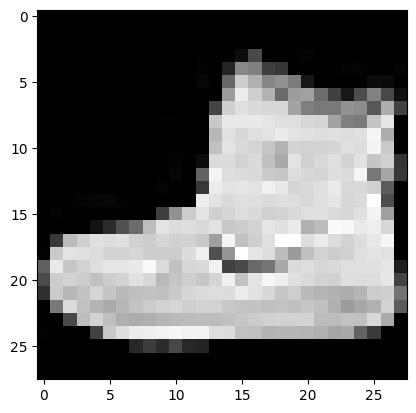

In [84]:
# Plot the first image from the training set
plt.imshow(train_images[0], cmap='gray')

In [85]:
# Print the label of the first image in the training set   
print(f'Label: {train_labels[0]}')

Label: 9


Label 9 is Ankle boot

2. Train a dense neural network using Keras (2 points)

#### Data preprocessing

In [86]:
# Reshape the images to 1D vectors
train_images = train_images.reshape((60000, 28 * 28))
test_images = test_images.reshape((10000, 28 * 28))

train_images = train_images.astype("float32") / 255
test_images = test_images.astype("float32") / 255

In [87]:
print(train_images.min())
print(train_images.max())
print(train_images.shape)
print(train_images[0].shape)

0.0
1.0
(60000, 784)
(784,)


#### Build the model

In [88]:
# Create the model
model = keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [89]:
# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#### Train the model

In [90]:
# Train the model
model.fit(train_images, train_labels, epochs=10, batch_size=128)

Epoch 1/10


  1/469 [..............................] - ETA: 1:36 - loss: 2.4236 - accuracy: 0.1797

/Users/pramodsaji/miniconda/envs/tensorflow_metal/lib/python3.10/site-packages/keras/src/backend.py:5714: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
2023-07-25 02:12:09.393545: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


469/469 [==============================] - 3s 6ms/step - loss: 0.5783 - accuracy: 0.8012
Epoch 2/10
469/469 [==============================] - 3s 6ms/step - loss: 0.4553 - accuracy: 0.8435
Epoch 3/10
469/469 [==============================] - 3s 6ms/step - loss: 0.4368 - accuracy: 0.8490
Epoch 4/10
469/469 [==============================] - 3s 6ms/step - loss: 0.4293 - accuracy: 0.8522
Epoch 5/10
469/469 [==============================] - 3s 6ms/step - loss: 0.4237 - accuracy: 0.8530
Epoch 6/10
469/469 [==============================] - 3s 6ms/step - loss: 0.4215 - accuracy: 0.8539
Epoch 7/10
469/469 [==============================] - 3s 5ms/step - loss: 0.4199 - accuracy: 0.8543
Epoch 8/10
469/469 [==============================] - 3s 5ms/step - loss: 0.4194 - accuracy: 0.8543
Epoch 9/10
469/469 [==============================] - 3s 6ms/step - loss: 0.4136 - accuracy: 0.8559
Epoch 10/10
469/469 [==============================] - 3s 5ms/step - loss: 0.4136 - accuracy: 0.8567


3. Evaluate its accuracy. Report accuracy, confusion metric, explore specific examples of incorrect classification, and drew some conclusions from this exploration (2 points)

In [91]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

# Print the test accuracy
print('\nTest loss:', test_loss)

# Print the test accuracy
print('\nTest accuracy:', test_acc)


2023-07-25 02:12:36.136396: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 - 1s - loss: 0.4615 - accuracy: 0.8385 - 1s/epoch - 4ms/step

Test loss: 0.461460679769516

Test accuracy: 0.8385000228881836


In [92]:
# Create a TensorFlow Keras Sequential model
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [93]:
# Make predictions
predictions = probability_model.predict(test_images)
predictions

114/313 [=========>....................] - ETA: 0s

2023-07-25 02:12:37.379790: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 0s 1ms/step


array([[0.08748761, 0.08748756, 0.0874882 , ..., 0.09410175, 0.08779391,
        0.1936269 ],
       [0.0867885 , 0.08675689, 0.20785598, ..., 0.08675689, 0.0867578 ,
        0.08675689],
       [0.08533751, 0.2319649 , 0.08533735, ..., 0.08533702, 0.08533702,
        0.08533702],
       ...,
       [0.09261423, 0.08846777, 0.08881868, ..., 0.08846785, 0.11172839,
        0.08846776],
       [0.08533859, 0.23194063, 0.08533862, ..., 0.08533856, 0.08533856,
        0.08533856],
       [0.08545144, 0.08545084, 0.0854722 , ..., 0.08574677, 0.08586797,
        0.0854521 ]], dtype=float32)

In [94]:
y_argmax_prediction = np.argmax(predictions, axis=1)
y_argmax_prediction

array([9, 2, 1, ..., 6, 1, 5])

In [95]:
confusion_matrix(test_labels, y_argmax_prediction)

array([[730,   3,  13,  44,  10,   0, 189,   0,  11,   0],
       [  2, 959,   2,  26,   5,   0,   4,   0,   2,   0],
       [ 22,   6, 712,   6, 148,   0, 100,   0,   6,   0],
       [ 16,  13,  25, 823,  43,   0,  77,   0,   3,   0],
       [  0,   1, 100,  23, 771,   0,  97,   0,   8,   0],
       [  0,   0,   0,   1,   0, 938,   0,  42,   5,  14],
       [ 98,   3, 107,  27, 116,   0, 632,   0,  17,   0],
       [  0,   0,   0,   0,   0,  32,   0, 940,   0,  28],
       [  7,   1,   5,  12,   4,   3,  21,   5, 942,   0],
       [  0,   1,   0,   0,   0,  14,   1,  45,   1, 938]])

Incorrect predictions:  1615


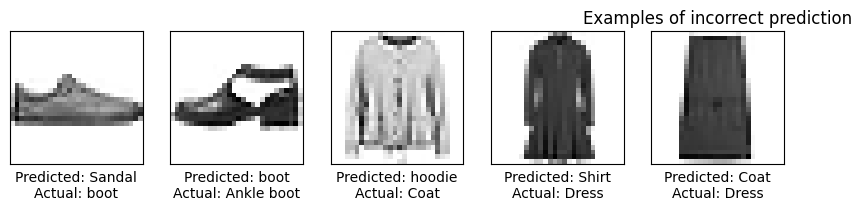

In [96]:
# Find the incorrect predictions
incorrects = np.nonzero(y_argmax_prediction != test_labels)[0]
incorrects
print("Incorrect predictions: ", len(incorrects))

# Plot first 5 incorrect predictions
plt.figure(figsize=(10,10))
for i, incorrect in enumerate(incorrects[:5]):
   
    plt.subplot(5,5,i+1)
    
    plt.xticks([])
    plt.yticks([])
    plt.imshow(test_images[incorrect].reshape(28,28), cmap=plt.cm.binary)
    plt.xlabel("Predicted: " + labels[y_argmax_prediction[incorrect]] + "\nActual: " + labels[test_labels[incorrect]])
plt.title("Examples of incorrect prediction")
plt.show()